## H.W # 1
### 2. Calculate the area encompassed by $x^2 + 4y^2 = 4$ & $(x- 1)^2 + y^2 = 1$ by using random sampling

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import warnings


def warn(*args, **kwargs):
    pass


warnings.warn = warn

%matplotlib inline

### Given two polynomials, $f1$ and $f2$

$ f1(x, y) = x^2 + 4y^2 - 4 $

$ f2(x, y) = (x-1)^2 + y^2 - 1 $

In [2]:
def f1(x, y):
    return np.power(x, 2) + 4*np.power(y, 2) - 4

def f2(x, y):
    return np.power(x-1, 2) + np.power(y, 2) - 1

### The graph of $f1$

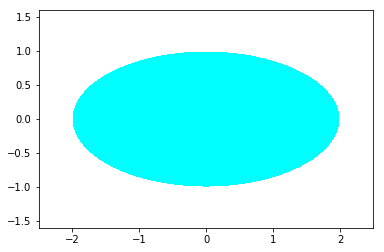

In [3]:
x = np.arange(-2.5, 2.5, 0.001)
y = np.arange(-1.6, 1.6, 0.001)

xx, yy = np.meshgrid(x, y)

z1 = np.power(xx, 2) + 4*np.power(yy, 2) - 4
idx1 = z1 <= 0
h = plt.contourf(x, y, z1, 0, colors=['cyan', 'w'])

### The graph of $f2$

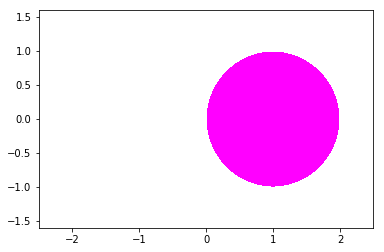

In [4]:
z2 = np.power(xx-1, 2) + np.power(yy, 2) - 1
idx2 = z2 <= 0
h = plt.contourf(x, y, z2, 0, colors=['magenta', 'w'])

### The graph of $f1$(cyan), $f2$(magenta) and their intersection(dark blue area)

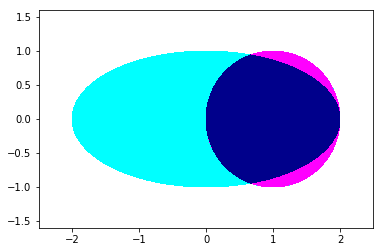

In [5]:
idx3 = idx1 + idx2 * 2
h = plt.contourf(x, y, idx3, 3, colors=['w', 'cyan', 'magenta', 'darkblue'])

### Monte carlo

Now, we can define the range of x, y for random sampling:

$$
x \sim Uniform(0, 2)\\
y \sim Uniform(-1, 1)
$$

But the maximum value of y is less than 1.

So, re-draw the graph

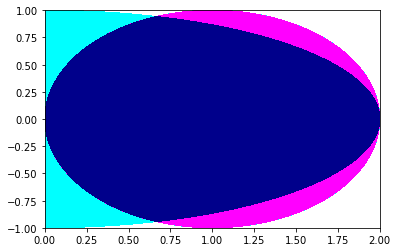

In [6]:
x = np.arange(0, 2, 0.001)
y = np.arange(-1., 1., 0.001)
xx, yy = np.meshgrid(x, y)
z1 = np.power(xx, 2) + 4*np.power(yy, 2) - 4
z2 = np.power(xx-1, 2) + np.power(yy, 2) - 1
idx1 = z1 <= 0
idx2 = z2 <= 0
idx3 = idx1 + idx2 * 2

h = plt.contourf(x, y, idx3, 3, colors=['w', 'cyan', 'magenta', 'darkblue'])

### The maximum value of $y$ at the point of $x = \frac{2}{3}$ is less than 1.

$$
y \sim Uniform(-f(x), f(x);x=2/3) \\
y \sim Uniform(-\frac{2\sqrt2}{3}, \frac{2\sqrt2}{3})
$$

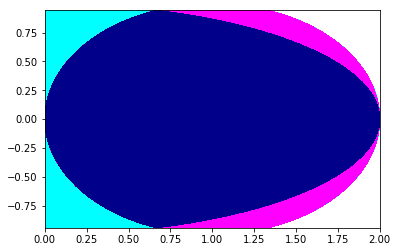

In [7]:
x = np.arange(0, 2, 0.001)
y = np.arange(-2*np.sqrt(2)/3, 2*np.sqrt(2)/3, 0.001)
xx, yy = np.meshgrid(x, y)
z1 = np.power(xx, 2) + 4*np.power(yy, 2) - 4
z2 = np.power(xx-1, 2) + np.power(yy, 2) - 1
idx1 = z1 <= 0
idx2 = z2 <= 0
idx3 = idx1 + idx2 * 2

h = plt.contourf(x, y, idx3, 3, colors=['w', 'cyan', 'magenta', 'darkblue'])

#### This graph is symmetric with respect to $x = 0$.
Therefore, we can still reduce the range of y:

$$
y \sim Uniform(0, \frac{2\sqrt2}{3})
$$

and re-draw the graph

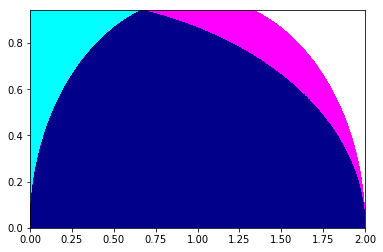

In [8]:
x = np.arange(0, 2, 0.001)
y = np.arange(0, 2*np.sqrt(2)/3, 0.001)
xx, yy = np.meshgrid(x, y)
z1 = np.power(xx, 2) + 4*np.power(yy, 2) - 4
z2 = np.power(xx-1, 2) + np.power(yy, 2) - 1
idx1 = z1 <= 0
idx2 = z2 <= 0
idx3 = idx1 + idx2 * 2

h = plt.contourf(x, y, idx3, 3, colors=['w', 'cyan', 'magenta', 'darkblue'])

#### Final version of ranges
$$
x \sim Uniform(0, 2) \\
y \sim Uniform(0, \frac{2\sqrt2}{3})
$$

In [9]:
pos = 0
for i in range(1000000):
    x_ = 2*np.random.rand(1)
    y_ = 2*np.sqrt(2)/3 * np.random.rand(1)

    if f1(x_, y_) <=0 and f2(x_, y_) <= 0:
        pos += 1
        
pos /= 1000000

#### Area = Whole area x 0.729588 x 2

In [11]:
area = 2 * (2 * np.sqrt(2) / 3) * 2 * pos
print(area)

2.7506981761219986
